## 1.7 使用Word Embedding实现中文自动摘要
###  1.7.1 背景说明
### 1.7.2 使用jieba分词

In [1]:
import jieba
import numpy as np

filePath='corpus.txt'
fileSegWordDonePath ='corpusSegDone_1.txt'

# 打印中文列表
def PrintListChinese(list):
    for i in range(len(list)):
        print (list[i]) 
                
# 读取文件内容到列表
fileTrainRead = []
with open(filePath,'r') as fileTrainRaw:
    for line in fileTrainRaw:  # 按行读取文件
        fileTrainRead.append(line)
    

# jieba分词后保存在列表中
fileTrainSeg=[]
for i in range(len(fileTrainRead)):
    fileTrainSeg.append([' '.join(list(jieba.cut(fileTrainRead[i][9:-11],cut_all=False)))])
    if i % 10000 == 0:
        print(i)
        

# 保存分词结果到文件中
with open(fileSegWordDonePath,'w',encoding='utf-8') as fW:
    for i in range(len(fileTrainSeg)):
        fW.write(fileTrainSeg[i][0])
        fW.write('\n')       


Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.090 seconds.
Prefix dict has been built successfully.


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


1164000
1165000
1166000
1167000
1168000
1169000
1170000
1171000
1172000
1173000
1174000
1175000
1176000
1177000
1178000
1179000
1180000
1181000
1182000
1183000
1184000
1185000
1186000
1187000
1188000
1189000
1190000
1191000
1192000
1193000
1194000
1195000
1196000
1197000
1198000
1199000
1200000
1201000
1202000
1203000
1204000
1205000
1206000
1207000
1208000
1209000
1210000
1211000
1212000
1213000
1214000
1215000
1216000
1217000
1218000
1219000
1220000
1221000
1222000
1223000
1224000
1225000
1226000
1227000
1228000
1229000
1230000
1231000
1232000
1233000
1234000
1235000
1236000
1237000
1238000
1239000
1240000
1241000
1242000
1243000
1244000
1245000
1246000
1247000
1248000
1249000
1250000
1251000
1252000
1253000
1254000
1255000
1256000
1257000
1258000
1259000
1260000
1261000
1262000
1263000
1264000
1265000
1266000
1267000
1268000
1269000
1270000
1271000
1272000
1273000
1274000
1275000
1276000
1277000
1278000
1279000
1280000
1281000
1282000
1283000
1284000
1285000
1286000
1287000
1288000


### 1.7.3 生成Embedding

In [3]:
"""
gensim word2vec获取词向量
"""

import warnings
import logging
import os.path
import sys
import multiprocessing

import gensim
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
# 忽略警告
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
 
if __name__ == '__main__':
    
    program = os.path.basename(sys.argv[0]) # 读取当前文件的文件名
    logger = logging.getLogger(program)
    logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s',level=logging.INFO)
    logger.info("running %s" % ' '.join(sys.argv))
 
    # inp为输入语料, outp1为输出模型, outp2为vector格式的模型
    inp = 'corpusSegDone_1.txt'
    out_model = 'corpusSegDone_1.model'
    out_vector = 'corpusSegDone_1.vector'
 
    # 训练skip-gram模型
    model = Word2Vec(LineSentence(inp), size=50, window=5, min_count=5,
                     workers=multiprocessing.cpu_count())
 
    # 保存模型
    model.save(out_model)
    # 保存词向量
    model.wv.save_word2vec_format(out_vector, binary=False)

2020-08-12 18:39:32,496: INFO: running /home/wumg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py -f /home/wumg/.local/share/jupyter/runtime/kernel-dac514bd-f389-4d51-b3dd-cb4d7aa4ea9b.json
2020-08-12 18:39:32,497: WARNING: consider setting layer size to a multiple of 4 for greater performance
2020-08-12 18:39:32,499: INFO: collecting all words and their counts
2020-08-12 18:39:32,501: INFO: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-08-12 18:39:33,474: INFO: PROGRESS: at sentence #10000, processed 2824257 words, keeping 114296 word types
2020-08-12 18:39:34,209: INFO: PROGRESS: at sentence #20000, processed 5746570 words, keeping 163657 word types
2020-08-12 18:39:34,956: INFO: PROGRESS: at sentence #30000, processed 8632366 words, keeping 198396 word types
2020-08-12 18:39:35,686: INFO: PROGRESS: at sentence #40000, processed 11477046 words, keeping 226260 word types
2020-08-12 18:39:36,410: INFO: PROGRESS: at sentence #50000, processed 1432187

2020-08-12 18:40:24,352: INFO: PROGRESS: at sentence #690000, processed 197470374 words, keeping 763781 word types
2020-08-12 18:40:25,109: INFO: PROGRESS: at sentence #700000, processed 200273098 words, keeping 766746 word types
2020-08-12 18:40:26,079: INFO: PROGRESS: at sentence #710000, processed 203453092 words, keeping 770999 word types
2020-08-12 18:40:26,986: INFO: PROGRESS: at sentence #720000, processed 206738243 words, keeping 774243 word types
2020-08-12 18:40:27,794: INFO: PROGRESS: at sentence #730000, processed 209834069 words, keeping 777409 word types
2020-08-12 18:40:28,507: INFO: PROGRESS: at sentence #740000, processed 212628434 words, keeping 780400 word types
2020-08-12 18:40:29,192: INFO: PROGRESS: at sentence #750000, processed 215355144 words, keeping 782502 word types
2020-08-12 18:40:29,857: INFO: PROGRESS: at sentence #760000, processed 218040230 words, keeping 784477 word types
2020-08-12 18:40:30,537: INFO: PROGRESS: at sentence #770000, processed 22071505

2020-08-12 18:42:32,590: INFO: EPOCH 1 - PROGRESS: at 0.51% examples, 535781 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:42:33,603: INFO: EPOCH 1 - PROGRESS: at 0.77% examples, 560969 words/s, in_qsize 64, out_qsize 1
2020-08-12 18:42:34,618: INFO: EPOCH 1 - PROGRESS: at 0.98% examples, 579481 words/s, in_qsize 63, out_qsize 1
2020-08-12 18:42:35,665: INFO: EPOCH 1 - PROGRESS: at 1.17% examples, 581742 words/s, in_qsize 64, out_qsize 0
2020-08-12 18:42:36,680: INFO: EPOCH 1 - PROGRESS: at 1.36% examples, 572990 words/s, in_qsize 60, out_qsize 4
2020-08-12 18:42:37,711: INFO: EPOCH 1 - PROGRESS: at 1.58% examples, 573088 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:42:38,729: INFO: EPOCH 1 - PROGRESS: at 1.79% examples, 578524 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:42:39,747: INFO: EPOCH 1 - PROGRESS: at 2.02% examples, 584182 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:42:40,753: INFO: EPOCH 1 - PROGRESS: at 2.20% examples, 586028 words/s, in_qsize 60, out_qsize 3
2

2020-08-12 18:43:47,900: INFO: EPOCH 1 - PROGRESS: at 14.36% examples, 569903 words/s, in_qsize 64, out_qsize 2
2020-08-12 18:43:48,942: INFO: EPOCH 1 - PROGRESS: at 14.53% examples, 569462 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:43:49,952: INFO: EPOCH 1 - PROGRESS: at 14.71% examples, 569322 words/s, in_qsize 64, out_qsize 0
2020-08-12 18:43:50,973: INFO: EPOCH 1 - PROGRESS: at 14.89% examples, 569136 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:43:51,983: INFO: EPOCH 1 - PROGRESS: at 15.07% examples, 569134 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:43:53,012: INFO: EPOCH 1 - PROGRESS: at 15.25% examples, 568896 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:43:54,043: INFO: EPOCH 1 - PROGRESS: at 15.43% examples, 569062 words/s, in_qsize 61, out_qsize 2
2020-08-12 18:43:55,060: INFO: EPOCH 1 - PROGRESS: at 15.62% examples, 568953 words/s, in_qsize 64, out_qsize 1
2020-08-12 18:43:56,081: INFO: EPOCH 1 - PROGRESS: at 15.79% examples, 568754 words/s, in_qsize 62, out_

2020-08-12 18:45:03,205: INFO: EPOCH 1 - PROGRESS: at 28.34% examples, 562139 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:45:04,232: INFO: EPOCH 1 - PROGRESS: at 28.56% examples, 562532 words/s, in_qsize 64, out_qsize 0
2020-08-12 18:45:05,235: INFO: EPOCH 1 - PROGRESS: at 28.73% examples, 562393 words/s, in_qsize 64, out_qsize 0
2020-08-12 18:45:06,242: INFO: EPOCH 1 - PROGRESS: at 28.89% examples, 562046 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:45:07,295: INFO: EPOCH 1 - PROGRESS: at 29.04% examples, 561636 words/s, in_qsize 64, out_qsize 2
2020-08-12 18:45:08,311: INFO: EPOCH 1 - PROGRESS: at 29.25% examples, 561682 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:45:09,326: INFO: EPOCH 1 - PROGRESS: at 29.45% examples, 561692 words/s, in_qsize 63, out_qsize 1
2020-08-12 18:45:10,339: INFO: EPOCH 1 - PROGRESS: at 29.64% examples, 561792 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:45:11,347: INFO: EPOCH 1 - PROGRESS: at 29.84% examples, 562139 words/s, in_qsize 64, out_

2020-08-12 18:46:18,238: INFO: EPOCH 1 - PROGRESS: at 42.40% examples, 559946 words/s, in_qsize 63, out_qsize 1
2020-08-12 18:46:19,246: INFO: EPOCH 1 - PROGRESS: at 42.57% examples, 559760 words/s, in_qsize 61, out_qsize 2
2020-08-12 18:46:20,256: INFO: EPOCH 1 - PROGRESS: at 42.79% examples, 559780 words/s, in_qsize 61, out_qsize 2
2020-08-12 18:46:21,272: INFO: EPOCH 1 - PROGRESS: at 43.01% examples, 559898 words/s, in_qsize 64, out_qsize 0
2020-08-12 18:46:22,288: INFO: EPOCH 1 - PROGRESS: at 43.22% examples, 559764 words/s, in_qsize 64, out_qsize 0
2020-08-12 18:46:23,293: INFO: EPOCH 1 - PROGRESS: at 43.42% examples, 559777 words/s, in_qsize 63, out_qsize 4
2020-08-12 18:46:24,303: INFO: EPOCH 1 - PROGRESS: at 43.57% examples, 559600 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:46:25,315: INFO: EPOCH 1 - PROGRESS: at 43.80% examples, 559781 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:46:26,316: INFO: EPOCH 1 - PROGRESS: at 44.01% examples, 559769 words/s, in_qsize 63, out_

2020-08-12 18:47:33,477: INFO: EPOCH 1 - PROGRESS: at 57.77% examples, 565294 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:47:34,493: INFO: EPOCH 1 - PROGRESS: at 58.02% examples, 565708 words/s, in_qsize 60, out_qsize 3
2020-08-12 18:47:35,507: INFO: EPOCH 1 - PROGRESS: at 58.30% examples, 566309 words/s, in_qsize 60, out_qsize 4
2020-08-12 18:47:36,511: INFO: EPOCH 1 - PROGRESS: at 58.54% examples, 566555 words/s, in_qsize 64, out_qsize 1
2020-08-12 18:47:37,523: INFO: EPOCH 1 - PROGRESS: at 58.82% examples, 566989 words/s, in_qsize 62, out_qsize 0
2020-08-12 18:47:38,551: INFO: EPOCH 1 - PROGRESS: at 59.05% examples, 567267 words/s, in_qsize 64, out_qsize 0
2020-08-12 18:47:39,553: INFO: EPOCH 1 - PROGRESS: at 59.27% examples, 567574 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:47:40,586: INFO: EPOCH 1 - PROGRESS: at 59.45% examples, 567417 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:47:41,606: INFO: EPOCH 1 - PROGRESS: at 59.68% examples, 567634 words/s, in_qsize 63, out_

2020-08-12 18:48:48,647: INFO: EPOCH 1 - PROGRESS: at 72.59% examples, 571958 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:48:49,652: INFO: EPOCH 1 - PROGRESS: at 72.72% examples, 571892 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:48:50,657: INFO: EPOCH 1 - PROGRESS: at 72.92% examples, 572032 words/s, in_qsize 64, out_qsize 1
2020-08-12 18:48:51,686: INFO: EPOCH 1 - PROGRESS: at 73.08% examples, 571904 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:48:52,698: INFO: EPOCH 1 - PROGRESS: at 73.29% examples, 572031 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:48:53,723: INFO: EPOCH 1 - PROGRESS: at 73.45% examples, 571925 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:48:54,727: INFO: EPOCH 1 - PROGRESS: at 73.63% examples, 572044 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:48:55,733: INFO: EPOCH 1 - PROGRESS: at 73.79% examples, 571884 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:48:56,745: INFO: EPOCH 1 - PROGRESS: at 74.01% examples, 572087 words/s, in_qsize 62, out_

2020-08-12 18:50:03,846: INFO: EPOCH 1 - PROGRESS: at 87.38% examples, 571755 words/s, in_qsize 58, out_qsize 5
2020-08-12 18:50:04,853: INFO: EPOCH 1 - PROGRESS: at 87.55% examples, 571826 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:50:05,871: INFO: EPOCH 1 - PROGRESS: at 87.70% examples, 571742 words/s, in_qsize 63, out_qsize 3
2020-08-12 18:50:06,927: INFO: EPOCH 1 - PROGRESS: at 87.88% examples, 571746 words/s, in_qsize 62, out_qsize 3
2020-08-12 18:50:07,973: INFO: EPOCH 1 - PROGRESS: at 88.05% examples, 571578 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:50:08,978: INFO: EPOCH 1 - PROGRESS: at 88.25% examples, 571651 words/s, in_qsize 61, out_qsize 2
2020-08-12 18:50:09,990: INFO: EPOCH 1 - PROGRESS: at 88.44% examples, 571579 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:50:10,991: INFO: EPOCH 1 - PROGRESS: at 88.64% examples, 571668 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:50:11,995: INFO: EPOCH 1 - PROGRESS: at 88.80% examples, 571612 words/s, in_qsize 64, out_

2020-08-12 18:51:13,328: INFO: worker thread finished; awaiting finish of 25 more threads
2020-08-12 18:51:13,331: INFO: worker thread finished; awaiting finish of 24 more threads
2020-08-12 18:51:13,341: INFO: worker thread finished; awaiting finish of 23 more threads
2020-08-12 18:51:13,356: INFO: worker thread finished; awaiting finish of 22 more threads
2020-08-12 18:51:13,367: INFO: worker thread finished; awaiting finish of 21 more threads
2020-08-12 18:51:13,378: INFO: worker thread finished; awaiting finish of 20 more threads
2020-08-12 18:51:13,380: INFO: worker thread finished; awaiting finish of 19 more threads
2020-08-12 18:51:13,385: INFO: worker thread finished; awaiting finish of 18 more threads
2020-08-12 18:51:13,386: INFO: worker thread finished; awaiting finish of 17 more threads
2020-08-12 18:51:13,389: INFO: worker thread finished; awaiting finish of 16 more threads
2020-08-12 18:51:13,401: INFO: worker thread finished; awaiting finish of 15 more threads
2020-08-12

2020-08-12 18:52:07,432: INFO: EPOCH 2 - PROGRESS: at 10.14% examples, 572494 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:52:08,438: INFO: EPOCH 2 - PROGRESS: at 10.33% examples, 573303 words/s, in_qsize 64, out_qsize 0
2020-08-12 18:52:09,441: INFO: EPOCH 2 - PROGRESS: at 10.47% examples, 572761 words/s, in_qsize 64, out_qsize 0
2020-08-12 18:52:10,455: INFO: EPOCH 2 - PROGRESS: at 10.62% examples, 572307 words/s, in_qsize 64, out_qsize 0
2020-08-12 18:52:11,471: INFO: EPOCH 2 - PROGRESS: at 10.81% examples, 572196 words/s, in_qsize 64, out_qsize 0
2020-08-12 18:52:12,486: INFO: EPOCH 2 - PROGRESS: at 10.99% examples, 572624 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:52:13,527: INFO: EPOCH 2 - PROGRESS: at 11.14% examples, 571594 words/s, in_qsize 61, out_qsize 2
2020-08-12 18:52:14,530: INFO: EPOCH 2 - PROGRESS: at 11.31% examples, 571746 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:52:15,548: INFO: EPOCH 2 - PROGRESS: at 11.50% examples, 571110 words/s, in_qsize 64, out_

2020-08-12 18:53:22,466: INFO: EPOCH 2 - PROGRESS: at 23.85% examples, 567848 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:53:23,505: INFO: EPOCH 2 - PROGRESS: at 24.09% examples, 567572 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:53:24,518: INFO: EPOCH 2 - PROGRESS: at 24.29% examples, 567736 words/s, in_qsize 63, out_qsize 1
2020-08-12 18:53:25,528: INFO: EPOCH 2 - PROGRESS: at 24.46% examples, 567619 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:53:26,557: INFO: EPOCH 2 - PROGRESS: at 24.67% examples, 567653 words/s, in_qsize 60, out_qsize 3
2020-08-12 18:53:27,568: INFO: EPOCH 2 - PROGRESS: at 24.84% examples, 567256 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:53:28,583: INFO: EPOCH 2 - PROGRESS: at 25.01% examples, 566978 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:53:29,598: INFO: EPOCH 2 - PROGRESS: at 25.24% examples, 567143 words/s, in_qsize 61, out_qsize 2
2020-08-12 18:53:30,616: INFO: EPOCH 2 - PROGRESS: at 25.43% examples, 566931 words/s, in_qsize 64, out_

2020-08-12 18:54:37,767: INFO: EPOCH 2 - PROGRESS: at 37.96% examples, 563367 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:54:38,767: INFO: EPOCH 2 - PROGRESS: at 38.14% examples, 563167 words/s, in_qsize 64, out_qsize 2
2020-08-12 18:54:39,770: INFO: EPOCH 2 - PROGRESS: at 38.37% examples, 563341 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:54:40,777: INFO: EPOCH 2 - PROGRESS: at 38.55% examples, 563222 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:54:41,788: INFO: EPOCH 2 - PROGRESS: at 38.74% examples, 563424 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:54:42,796: INFO: EPOCH 2 - PROGRESS: at 38.91% examples, 563277 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:54:43,807: INFO: EPOCH 2 - PROGRESS: at 39.18% examples, 563932 words/s, in_qsize 63, out_qsize 1
2020-08-12 18:54:44,823: INFO: EPOCH 2 - PROGRESS: at 39.45% examples, 564219 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:54:45,823: INFO: EPOCH 2 - PROGRESS: at 39.69% examples, 564728 words/s, in_qsize 63, out_

2020-08-12 18:55:52,852: INFO: EPOCH 2 - PROGRESS: at 53.58% examples, 568343 words/s, in_qsize 61, out_qsize 2
2020-08-12 18:55:53,854: INFO: EPOCH 2 - PROGRESS: at 53.83% examples, 568697 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:55:54,860: INFO: EPOCH 2 - PROGRESS: at 53.98% examples, 568495 words/s, in_qsize 64, out_qsize 3
2020-08-12 18:55:55,895: INFO: EPOCH 2 - PROGRESS: at 54.20% examples, 568814 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:55:56,905: INFO: EPOCH 2 - PROGRESS: at 54.36% examples, 568701 words/s, in_qsize 63, out_qsize 1
2020-08-12 18:55:57,912: INFO: EPOCH 2 - PROGRESS: at 54.54% examples, 568813 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:55:58,929: INFO: EPOCH 2 - PROGRESS: at 54.69% examples, 568591 words/s, in_qsize 61, out_qsize 2
2020-08-12 18:55:59,937: INFO: EPOCH 2 - PROGRESS: at 54.89% examples, 568872 words/s, in_qsize 60, out_qsize 3
2020-08-12 18:56:00,945: INFO: EPOCH 2 - PROGRESS: at 55.06% examples, 568961 words/s, in_qsize 62, out_

2020-08-12 18:57:08,171: INFO: EPOCH 2 - PROGRESS: at 68.52% examples, 574051 words/s, in_qsize 64, out_qsize 0
2020-08-12 18:57:09,174: INFO: EPOCH 2 - PROGRESS: at 68.70% examples, 573991 words/s, in_qsize 62, out_qsize 6
2020-08-12 18:57:10,203: INFO: EPOCH 2 - PROGRESS: at 68.85% examples, 573983 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:57:11,212: INFO: EPOCH 2 - PROGRESS: at 68.99% examples, 573843 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:57:12,221: INFO: EPOCH 2 - PROGRESS: at 69.16% examples, 573863 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:57:13,254: INFO: EPOCH 2 - PROGRESS: at 69.31% examples, 573594 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:57:14,273: INFO: EPOCH 2 - PROGRESS: at 69.51% examples, 573600 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:57:15,285: INFO: EPOCH 2 - PROGRESS: at 69.67% examples, 573487 words/s, in_qsize 64, out_qsize 0
2020-08-12 18:57:16,311: INFO: EPOCH 2 - PROGRESS: at 69.85% examples, 573608 words/s, in_qsize 63, out_

2020-08-12 18:58:23,812: INFO: EPOCH 2 - PROGRESS: at 82.97% examples, 572441 words/s, in_qsize 61, out_qsize 3
2020-08-12 18:58:24,851: INFO: EPOCH 2 - PROGRESS: at 83.16% examples, 572380 words/s, in_qsize 64, out_qsize 1
2020-08-12 18:58:25,852: INFO: EPOCH 2 - PROGRESS: at 83.37% examples, 572338 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:58:26,855: INFO: EPOCH 2 - PROGRESS: at 83.61% examples, 572470 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:58:27,859: INFO: EPOCH 2 - PROGRESS: at 83.80% examples, 572588 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:58:28,863: INFO: EPOCH 2 - PROGRESS: at 84.02% examples, 572769 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:58:29,882: INFO: EPOCH 2 - PROGRESS: at 84.20% examples, 572759 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:58:30,911: INFO: EPOCH 2 - PROGRESS: at 84.43% examples, 572772 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:58:31,923: INFO: EPOCH 2 - PROGRESS: at 84.62% examples, 572814 words/s, in_qsize 64, out_

2020-08-12 18:59:38,957: INFO: EPOCH 2 - PROGRESS: at 96.44% examples, 570892 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:59:39,967: INFO: EPOCH 2 - PROGRESS: at 96.60% examples, 570652 words/s, in_qsize 62, out_qsize 1
2020-08-12 18:59:40,979: INFO: EPOCH 2 - PROGRESS: at 96.82% examples, 570696 words/s, in_qsize 62, out_qsize 4
2020-08-12 18:59:42,005: INFO: EPOCH 2 - PROGRESS: at 97.00% examples, 570726 words/s, in_qsize 64, out_qsize 1
2020-08-12 18:59:43,016: INFO: EPOCH 2 - PROGRESS: at 97.18% examples, 570580 words/s, in_qsize 64, out_qsize 0
2020-08-12 18:59:44,018: INFO: EPOCH 2 - PROGRESS: at 97.35% examples, 570538 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:59:45,042: INFO: EPOCH 2 - PROGRESS: at 97.51% examples, 570461 words/s, in_qsize 63, out_qsize 0
2020-08-12 18:59:46,066: INFO: EPOCH 2 - PROGRESS: at 97.73% examples, 570509 words/s, in_qsize 64, out_qsize 0
2020-08-12 18:59:47,116: INFO: EPOCH 2 - PROGRESS: at 97.93% examples, 570454 words/s, in_qsize 63, out_

2020-08-12 19:00:27,029: INFO: EPOCH 3 - PROGRESS: at 5.59% examples, 555994 words/s, in_qsize 61, out_qsize 2
2020-08-12 19:00:28,056: INFO: EPOCH 3 - PROGRESS: at 5.80% examples, 557098 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:00:29,058: INFO: EPOCH 3 - PROGRESS: at 6.06% examples, 556835 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:00:30,079: INFO: EPOCH 3 - PROGRESS: at 6.24% examples, 556826 words/s, in_qsize 64, out_qsize 0
2020-08-12 19:00:31,088: INFO: EPOCH 3 - PROGRESS: at 6.41% examples, 556488 words/s, in_qsize 64, out_qsize 1
2020-08-12 19:00:32,101: INFO: EPOCH 3 - PROGRESS: at 6.59% examples, 556410 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:00:33,109: INFO: EPOCH 3 - PROGRESS: at 6.78% examples, 557020 words/s, in_qsize 64, out_qsize 0
2020-08-12 19:00:34,111: INFO: EPOCH 3 - PROGRESS: at 6.95% examples, 556822 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:00:35,115: INFO: EPOCH 3 - PROGRESS: at 7.13% examples, 557813 words/s, in_qsize 63, out_qsize 1
2

2020-08-12 19:01:42,051: INFO: EPOCH 3 - PROGRESS: at 19.13% examples, 566132 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:01:43,072: INFO: EPOCH 3 - PROGRESS: at 19.30% examples, 565733 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:01:44,095: INFO: EPOCH 3 - PROGRESS: at 19.47% examples, 565187 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:01:45,118: INFO: EPOCH 3 - PROGRESS: at 19.67% examples, 565022 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:01:46,120: INFO: EPOCH 3 - PROGRESS: at 19.87% examples, 565333 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:01:47,158: INFO: EPOCH 3 - PROGRESS: at 20.05% examples, 565186 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:01:48,158: INFO: EPOCH 3 - PROGRESS: at 20.26% examples, 564900 words/s, in_qsize 64, out_qsize 2
2020-08-12 19:01:49,161: INFO: EPOCH 3 - PROGRESS: at 20.44% examples, 564992 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:01:50,173: INFO: EPOCH 3 - PROGRESS: at 20.61% examples, 564736 words/s, in_qsize 64, out_

2020-08-12 19:02:57,219: INFO: EPOCH 3 - PROGRESS: at 33.38% examples, 564831 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:02:58,230: INFO: EPOCH 3 - PROGRESS: at 33.53% examples, 564492 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:02:59,232: INFO: EPOCH 3 - PROGRESS: at 33.69% examples, 564222 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:03:00,240: INFO: EPOCH 3 - PROGRESS: at 33.87% examples, 564164 words/s, in_qsize 63, out_qsize 2
2020-08-12 19:03:01,267: INFO: EPOCH 3 - PROGRESS: at 34.03% examples, 564109 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:03:02,275: INFO: EPOCH 3 - PROGRESS: at 34.26% examples, 564091 words/s, in_qsize 64, out_qsize 1
2020-08-12 19:03:03,299: INFO: EPOCH 3 - PROGRESS: at 34.47% examples, 563987 words/s, in_qsize 61, out_qsize 2
2020-08-12 19:03:04,332: INFO: EPOCH 3 - PROGRESS: at 34.66% examples, 564098 words/s, in_qsize 61, out_qsize 2
2020-08-12 19:03:05,344: INFO: EPOCH 3 - PROGRESS: at 34.82% examples, 563734 words/s, in_qsize 63, out_

2020-08-12 19:04:12,508: INFO: EPOCH 3 - PROGRESS: at 48.77% examples, 567200 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:04:13,535: INFO: EPOCH 3 - PROGRESS: at 48.94% examples, 567219 words/s, in_qsize 63, out_qsize 2
2020-08-12 19:04:14,535: INFO: EPOCH 3 - PROGRESS: at 49.21% examples, 567376 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:04:15,544: INFO: EPOCH 3 - PROGRESS: at 49.40% examples, 567391 words/s, in_qsize 61, out_qsize 2
2020-08-12 19:04:16,546: INFO: EPOCH 3 - PROGRESS: at 49.59% examples, 567468 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:04:17,565: INFO: EPOCH 3 - PROGRESS: at 49.83% examples, 567743 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:04:18,591: INFO: EPOCH 3 - PROGRESS: at 50.01% examples, 567446 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:04:19,592: INFO: EPOCH 3 - PROGRESS: at 50.21% examples, 567724 words/s, in_qsize 64, out_qsize 1
2020-08-12 19:04:20,601: INFO: EPOCH 3 - PROGRESS: at 50.41% examples, 567777 words/s, in_qsize 62, out_

2020-08-12 19:05:27,900: INFO: EPOCH 3 - PROGRESS: at 64.21% examples, 575450 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:05:28,905: INFO: EPOCH 3 - PROGRESS: at 64.38% examples, 575224 words/s, in_qsize 64, out_qsize 1
2020-08-12 19:05:29,917: INFO: EPOCH 3 - PROGRESS: at 64.61% examples, 575563 words/s, in_qsize 64, out_qsize 0
2020-08-12 19:05:30,947: INFO: EPOCH 3 - PROGRESS: at 64.85% examples, 575656 words/s, in_qsize 63, out_qsize 5
2020-08-12 19:05:31,949: INFO: EPOCH 3 - PROGRESS: at 65.08% examples, 575876 words/s, in_qsize 62, out_qsize 3
2020-08-12 19:05:32,952: INFO: EPOCH 3 - PROGRESS: at 65.27% examples, 575948 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:05:33,972: INFO: EPOCH 3 - PROGRESS: at 65.49% examples, 575983 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:05:34,991: INFO: EPOCH 3 - PROGRESS: at 65.70% examples, 576002 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:05:35,992: INFO: EPOCH 3 - PROGRESS: at 65.89% examples, 576111 words/s, in_qsize 64, out_

2020-08-12 19:06:43,160: INFO: EPOCH 3 - PROGRESS: at 78.68% examples, 578185 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:06:44,206: INFO: EPOCH 3 - PROGRESS: at 78.86% examples, 578022 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:06:45,248: INFO: EPOCH 3 - PROGRESS: at 79.06% examples, 578066 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:06:46,251: INFO: EPOCH 3 - PROGRESS: at 79.25% examples, 577944 words/s, in_qsize 61, out_qsize 3
2020-08-12 19:06:47,264: INFO: EPOCH 3 - PROGRESS: at 79.48% examples, 577965 words/s, in_qsize 63, out_qsize 1
2020-08-12 19:06:48,283: INFO: EPOCH 3 - PROGRESS: at 79.69% examples, 577875 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:06:49,287: INFO: EPOCH 3 - PROGRESS: at 79.94% examples, 578120 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:06:50,289: INFO: EPOCH 3 - PROGRESS: at 80.15% examples, 578045 words/s, in_qsize 64, out_qsize 0
2020-08-12 19:06:51,317: INFO: EPOCH 3 - PROGRESS: at 80.42% examples, 578255 words/s, in_qsize 62, out_

2020-08-12 19:07:58,296: INFO: EPOCH 3 - PROGRESS: at 93.25% examples, 579558 words/s, in_qsize 64, out_qsize 1
2020-08-12 19:07:59,306: INFO: EPOCH 3 - PROGRESS: at 93.46% examples, 579888 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:08:00,312: INFO: EPOCH 3 - PROGRESS: at 93.64% examples, 579867 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:08:01,315: INFO: EPOCH 3 - PROGRESS: at 93.88% examples, 579944 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:08:02,321: INFO: EPOCH 3 - PROGRESS: at 94.04% examples, 579833 words/s, in_qsize 64, out_qsize 0
2020-08-12 19:08:03,333: INFO: EPOCH 3 - PROGRESS: at 94.22% examples, 579766 words/s, in_qsize 61, out_qsize 2
2020-08-12 19:08:04,345: INFO: EPOCH 3 - PROGRESS: at 94.38% examples, 579665 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:08:05,349: INFO: EPOCH 3 - PROGRESS: at 94.55% examples, 579625 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:08:06,391: INFO: EPOCH 3 - PROGRESS: at 94.71% examples, 579486 words/s, in_qsize 64, out_

2020-08-12 19:08:46,363: INFO: EPOCH 4 - PROGRESS: at 2.17% examples, 580003 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:08:47,387: INFO: EPOCH 4 - PROGRESS: at 2.34% examples, 576009 words/s, in_qsize 64, out_qsize 1
2020-08-12 19:08:48,418: INFO: EPOCH 4 - PROGRESS: at 2.56% examples, 576653 words/s, in_qsize 64, out_qsize 2
2020-08-12 19:08:49,445: INFO: EPOCH 4 - PROGRESS: at 2.76% examples, 579149 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:08:50,463: INFO: EPOCH 4 - PROGRESS: at 2.97% examples, 580255 words/s, in_qsize 61, out_qsize 2
2020-08-12 19:08:51,480: INFO: EPOCH 4 - PROGRESS: at 3.17% examples, 583616 words/s, in_qsize 63, out_qsize 1
2020-08-12 19:08:52,499: INFO: EPOCH 4 - PROGRESS: at 3.37% examples, 581064 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:08:53,524: INFO: EPOCH 4 - PROGRESS: at 3.55% examples, 580109 words/s, in_qsize 61, out_qsize 2
2020-08-12 19:08:54,557: INFO: EPOCH 4 - PROGRESS: at 3.79% examples, 581839 words/s, in_qsize 64, out_qsize 0
2

2020-08-12 19:10:01,705: INFO: EPOCH 4 - PROGRESS: at 16.19% examples, 582662 words/s, in_qsize 59, out_qsize 0
2020-08-12 19:10:02,705: INFO: EPOCH 4 - PROGRESS: at 16.39% examples, 583526 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:10:03,717: INFO: EPOCH 4 - PROGRESS: at 16.54% examples, 582482 words/s, in_qsize 64, out_qsize 4
2020-08-12 19:10:04,722: INFO: EPOCH 4 - PROGRESS: at 16.74% examples, 582536 words/s, in_qsize 64, out_qsize 2
2020-08-12 19:10:05,765: INFO: EPOCH 4 - PROGRESS: at 16.93% examples, 581945 words/s, in_qsize 61, out_qsize 2
2020-08-12 19:10:06,779: INFO: EPOCH 4 - PROGRESS: at 17.12% examples, 581928 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:10:07,818: INFO: EPOCH 4 - PROGRESS: at 17.30% examples, 581225 words/s, in_qsize 64, out_qsize 0
2020-08-12 19:10:08,827: INFO: EPOCH 4 - PROGRESS: at 17.51% examples, 581369 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:10:09,833: INFO: EPOCH 4 - PROGRESS: at 17.70% examples, 581431 words/s, in_qsize 63, out_

2020-08-12 19:11:16,722: INFO: EPOCH 4 - PROGRESS: at 30.47% examples, 574872 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:11:17,750: INFO: EPOCH 4 - PROGRESS: at 30.65% examples, 574589 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:11:18,767: INFO: EPOCH 4 - PROGRESS: at 30.85% examples, 574573 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:11:19,773: INFO: EPOCH 4 - PROGRESS: at 31.01% examples, 574232 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:11:20,794: INFO: EPOCH 4 - PROGRESS: at 31.20% examples, 574111 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:11:21,844: INFO: EPOCH 4 - PROGRESS: at 31.38% examples, 573691 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:11:22,892: INFO: EPOCH 4 - PROGRESS: at 31.57% examples, 573862 words/s, in_qsize 64, out_qsize 1
2020-08-12 19:11:23,919: INFO: EPOCH 4 - PROGRESS: at 31.74% examples, 573538 words/s, in_qsize 64, out_qsize 1
2020-08-12 19:11:24,923: INFO: EPOCH 4 - PROGRESS: at 31.93% examples, 573467 words/s, in_qsize 64, out_

2020-08-12 19:12:31,982: INFO: EPOCH 4 - PROGRESS: at 45.65% examples, 577849 words/s, in_qsize 64, out_qsize 1
2020-08-12 19:12:32,991: INFO: EPOCH 4 - PROGRESS: at 45.86% examples, 577783 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:12:33,994: INFO: EPOCH 4 - PROGRESS: at 46.06% examples, 577523 words/s, in_qsize 64, out_qsize 0
2020-08-12 19:12:34,998: INFO: EPOCH 4 - PROGRESS: at 46.29% examples, 577795 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:12:36,029: INFO: EPOCH 4 - PROGRESS: at 46.46% examples, 577766 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:12:37,032: INFO: EPOCH 4 - PROGRESS: at 46.74% examples, 577916 words/s, in_qsize 61, out_qsize 2
2020-08-12 19:12:38,034: INFO: EPOCH 4 - PROGRESS: at 47.01% examples, 578112 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:12:39,041: INFO: EPOCH 4 - PROGRESS: at 47.27% examples, 578144 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:12:40,051: INFO: EPOCH 4 - PROGRESS: at 47.47% examples, 578183 words/s, in_qsize 63, out_

2020-08-12 19:13:47,115: INFO: EPOCH 4 - PROGRESS: at 61.51% examples, 584644 words/s, in_qsize 63, out_qsize 2
2020-08-12 19:13:48,118: INFO: EPOCH 4 - PROGRESS: at 61.76% examples, 584925 words/s, in_qsize 64, out_qsize 0
2020-08-12 19:13:49,137: INFO: EPOCH 4 - PROGRESS: at 61.94% examples, 584964 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:13:50,154: INFO: EPOCH 4 - PROGRESS: at 62.17% examples, 585024 words/s, in_qsize 63, out_qsize 3
2020-08-12 19:13:51,183: INFO: EPOCH 4 - PROGRESS: at 62.34% examples, 584885 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:13:52,219: INFO: EPOCH 4 - PROGRESS: at 62.57% examples, 585138 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:13:53,224: INFO: EPOCH 4 - PROGRESS: at 62.78% examples, 585074 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:13:54,229: INFO: EPOCH 4 - PROGRESS: at 62.97% examples, 585055 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:13:55,254: INFO: EPOCH 4 - PROGRESS: at 63.21% examples, 585087 words/s, in_qsize 63, out_

2020-08-12 19:15:02,178: INFO: EPOCH 4 - PROGRESS: at 75.86% examples, 586628 words/s, in_qsize 64, out_qsize 0
2020-08-12 19:15:03,188: INFO: EPOCH 4 - PROGRESS: at 76.08% examples, 586566 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:15:04,224: INFO: EPOCH 4 - PROGRESS: at 76.26% examples, 586246 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:15:05,250: INFO: EPOCH 4 - PROGRESS: at 76.57% examples, 586197 words/s, in_qsize 64, out_qsize 0
2020-08-12 19:15:06,251: INFO: EPOCH 4 - PROGRESS: at 76.81% examples, 586057 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:15:07,271: INFO: EPOCH 4 - PROGRESS: at 76.98% examples, 585998 words/s, in_qsize 64, out_qsize 1
2020-08-12 19:15:08,277: INFO: EPOCH 4 - PROGRESS: at 77.24% examples, 586468 words/s, in_qsize 61, out_qsize 0
2020-08-12 19:15:09,278: INFO: EPOCH 4 - PROGRESS: at 77.48% examples, 586827 words/s, in_qsize 61, out_qsize 2
2020-08-12 19:15:10,283: INFO: EPOCH 4 - PROGRESS: at 77.70% examples, 587073 words/s, in_qsize 64, out_

2020-08-12 19:16:17,416: INFO: EPOCH 4 - PROGRESS: at 91.00% examples, 587338 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:16:18,416: INFO: EPOCH 4 - PROGRESS: at 91.21% examples, 587416 words/s, in_qsize 61, out_qsize 2
2020-08-12 19:16:19,419: INFO: EPOCH 4 - PROGRESS: at 91.40% examples, 587236 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:16:20,439: INFO: EPOCH 4 - PROGRESS: at 91.55% examples, 587143 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:16:21,455: INFO: EPOCH 4 - PROGRESS: at 91.73% examples, 587118 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:16:22,475: INFO: EPOCH 4 - PROGRESS: at 91.90% examples, 587066 words/s, in_qsize 64, out_qsize 1
2020-08-12 19:16:23,479: INFO: EPOCH 4 - PROGRESS: at 92.08% examples, 587071 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:16:24,492: INFO: EPOCH 4 - PROGRESS: at 92.27% examples, 587061 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:16:25,513: INFO: EPOCH 4 - PROGRESS: at 92.49% examples, 587167 words/s, in_qsize 63, out_

2020-08-12 19:17:05,844: INFO: EPOCH - 4 : training on 374878375 raw words (299202942 effective words) took 510.6s, 585982 effective words/s
2020-08-12 19:17:06,885: INFO: EPOCH 5 - PROGRESS: at 0.13% examples, 381900 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:17:07,885: INFO: EPOCH 5 - PROGRESS: at 0.34% examples, 520561 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:17:08,902: INFO: EPOCH 5 - PROGRESS: at 0.50% examples, 524858 words/s, in_qsize 64, out_qsize 2
2020-08-12 19:17:09,913: INFO: EPOCH 5 - PROGRESS: at 0.79% examples, 574240 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:17:10,921: INFO: EPOCH 5 - PROGRESS: at 1.05% examples, 621639 words/s, in_qsize 59, out_qsize 4
2020-08-12 19:17:11,929: INFO: EPOCH 5 - PROGRESS: at 1.32% examples, 648960 words/s, in_qsize 64, out_qsize 0
2020-08-12 19:17:12,936: INFO: EPOCH 5 - PROGRESS: at 1.56% examples, 655338 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:17:13,957: INFO: EPOCH 5 - PROGRESS: at 1.78% examples, 653836 words

2020-08-12 19:18:20,953: INFO: EPOCH 5 - PROGRESS: at 14.07% examples, 581306 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:18:21,959: INFO: EPOCH 5 - PROGRESS: at 14.23% examples, 580620 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:18:22,967: INFO: EPOCH 5 - PROGRESS: at 14.42% examples, 581212 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:18:23,981: INFO: EPOCH 5 - PROGRESS: at 14.56% examples, 579606 words/s, in_qsize 58, out_qsize 6
2020-08-12 19:18:24,984: INFO: EPOCH 5 - PROGRESS: at 14.78% examples, 580888 words/s, in_qsize 64, out_qsize 0
2020-08-12 19:18:26,001: INFO: EPOCH 5 - PROGRESS: at 14.97% examples, 581027 words/s, in_qsize 64, out_qsize 0
2020-08-12 19:18:27,002: INFO: EPOCH 5 - PROGRESS: at 15.14% examples, 580749 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:18:28,020: INFO: EPOCH 5 - PROGRESS: at 15.31% examples, 580042 words/s, in_qsize 61, out_qsize 2
2020-08-12 19:18:29,019: INFO: EPOCH 5 - PROGRESS: at 15.47% examples, 579936 words/s, in_qsize 63, out_

2020-08-12 19:19:36,087: INFO: EPOCH 5 - PROGRESS: at 28.26% examples, 573268 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:19:37,098: INFO: EPOCH 5 - PROGRESS: at 28.44% examples, 573181 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:19:38,134: INFO: EPOCH 5 - PROGRESS: at 28.66% examples, 573514 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:19:39,159: INFO: EPOCH 5 - PROGRESS: at 28.86% examples, 573821 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:19:40,171: INFO: EPOCH 5 - PROGRESS: at 29.03% examples, 573830 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:19:41,173: INFO: EPOCH 5 - PROGRESS: at 29.23% examples, 573646 words/s, in_qsize 64, out_qsize 0
2020-08-12 19:19:42,196: INFO: EPOCH 5 - PROGRESS: at 29.42% examples, 573494 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:19:43,200: INFO: EPOCH 5 - PROGRESS: at 29.62% examples, 573700 words/s, in_qsize 63, out_qsize 1
2020-08-12 19:19:44,222: INFO: EPOCH 5 - PROGRESS: at 29.82% examples, 573832 words/s, in_qsize 63, out_

2020-08-12 19:20:51,329: INFO: EPOCH 5 - PROGRESS: at 42.95% examples, 574658 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:20:52,343: INFO: EPOCH 5 - PROGRESS: at 43.15% examples, 574487 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:20:53,367: INFO: EPOCH 5 - PROGRESS: at 43.38% examples, 574600 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:20:54,426: INFO: EPOCH 5 - PROGRESS: at 43.54% examples, 574229 words/s, in_qsize 61, out_qsize 2
2020-08-12 19:20:55,447: INFO: EPOCH 5 - PROGRESS: at 43.74% examples, 574109 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:20:56,453: INFO: EPOCH 5 - PROGRESS: at 43.95% examples, 574066 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:20:57,456: INFO: EPOCH 5 - PROGRESS: at 44.14% examples, 574138 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:20:58,463: INFO: EPOCH 5 - PROGRESS: at 44.37% examples, 574057 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:20:59,484: INFO: EPOCH 5 - PROGRESS: at 44.60% examples, 574150 words/s, in_qsize 62, out_

2020-08-12 19:22:06,671: INFO: EPOCH 5 - PROGRESS: at 58.67% examples, 579210 words/s, in_qsize 60, out_qsize 4
2020-08-12 19:22:07,697: INFO: EPOCH 5 - PROGRESS: at 58.93% examples, 579487 words/s, in_qsize 63, out_qsize 2
2020-08-12 19:22:08,729: INFO: EPOCH 5 - PROGRESS: at 59.12% examples, 579364 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:22:09,751: INFO: EPOCH 5 - PROGRESS: at 59.33% examples, 579400 words/s, in_qsize 61, out_qsize 2
2020-08-12 19:22:10,771: INFO: EPOCH 5 - PROGRESS: at 59.50% examples, 579273 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:22:11,770: INFO: EPOCH 5 - PROGRESS: at 59.72% examples, 579411 words/s, in_qsize 59, out_qsize 4
2020-08-12 19:22:12,792: INFO: EPOCH 5 - PROGRESS: at 59.88% examples, 579281 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:22:13,806: INFO: EPOCH 5 - PROGRESS: at 60.13% examples, 579532 words/s, in_qsize 61, out_qsize 2
2020-08-12 19:22:14,834: INFO: EPOCH 5 - PROGRESS: at 60.38% examples, 579551 words/s, in_qsize 62, out_

2020-08-12 19:23:21,959: INFO: EPOCH 5 - PROGRESS: at 73.41% examples, 583713 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:23:22,960: INFO: EPOCH 5 - PROGRESS: at 73.59% examples, 583912 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:23:23,979: INFO: EPOCH 5 - PROGRESS: at 73.76% examples, 583838 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:23:24,981: INFO: EPOCH 5 - PROGRESS: at 73.97% examples, 583929 words/s, in_qsize 64, out_qsize 1
2020-08-12 19:23:25,987: INFO: EPOCH 5 - PROGRESS: at 74.17% examples, 583934 words/s, in_qsize 64, out_qsize 0
2020-08-12 19:23:27,002: INFO: EPOCH 5 - PROGRESS: at 74.35% examples, 584048 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:23:28,008: INFO: EPOCH 5 - PROGRESS: at 74.48% examples, 583981 words/s, in_qsize 63, out_qsize 2
2020-08-12 19:23:29,020: INFO: EPOCH 5 - PROGRESS: at 74.66% examples, 584040 words/s, in_qsize 59, out_qsize 4
2020-08-12 19:23:30,040: INFO: EPOCH 5 - PROGRESS: at 74.87% examples, 583980 words/s, in_qsize 62, out_

2020-08-12 19:24:37,072: INFO: EPOCH 5 - PROGRESS: at 88.70% examples, 585022 words/s, in_qsize 62, out_qsize 1
2020-08-12 19:24:38,072: INFO: EPOCH 5 - PROGRESS: at 88.87% examples, 585076 words/s, in_qsize 59, out_qsize 2
2020-08-12 19:24:39,104: INFO: EPOCH 5 - PROGRESS: at 89.01% examples, 584895 words/s, in_qsize 64, out_qsize 0
2020-08-12 19:24:40,114: INFO: EPOCH 5 - PROGRESS: at 89.20% examples, 584872 words/s, in_qsize 60, out_qsize 3
2020-08-12 19:24:41,126: INFO: EPOCH 5 - PROGRESS: at 89.37% examples, 584788 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:24:42,137: INFO: EPOCH 5 - PROGRESS: at 89.55% examples, 584753 words/s, in_qsize 63, out_qsize 0
2020-08-12 19:24:43,142: INFO: EPOCH 5 - PROGRESS: at 89.71% examples, 584558 words/s, in_qsize 59, out_qsize 4
2020-08-12 19:24:44,190: INFO: EPOCH 5 - PROGRESS: at 89.93% examples, 584623 words/s, in_qsize 61, out_qsize 2
2020-08-12 19:24:45,225: INFO: EPOCH 5 - PROGRESS: at 90.08% examples, 584497 words/s, in_qsize 63, out_

2020-08-12 19:25:37,206: INFO: worker thread finished; awaiting finish of 13 more threads
2020-08-12 19:25:37,208: INFO: worker thread finished; awaiting finish of 12 more threads
2020-08-12 19:25:37,212: INFO: worker thread finished; awaiting finish of 11 more threads
2020-08-12 19:25:37,213: INFO: worker thread finished; awaiting finish of 10 more threads
2020-08-12 19:25:37,214: INFO: worker thread finished; awaiting finish of 9 more threads
2020-08-12 19:25:37,214: INFO: worker thread finished; awaiting finish of 8 more threads
2020-08-12 19:25:37,215: INFO: worker thread finished; awaiting finish of 7 more threads
2020-08-12 19:25:37,215: INFO: worker thread finished; awaiting finish of 6 more threads
2020-08-12 19:25:37,216: INFO: worker thread finished; awaiting finish of 5 more threads
2020-08-12 19:25:37,217: INFO: worker thread finished; awaiting finish of 4 more threads
2020-08-12 19:25:37,217: INFO: worker thread finished; awaiting finish of 3 more threads
2020-08-12 19:25:

### 1.7.4 把文档的词转换为词向量

In [4]:
# 采用Word2Vec词聚类方法抽取关键词1——获取文本词向量表示
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')  # 忽略警告
import sys, codecs
import pandas as pd
import numpy as np
import jieba
import jieba.posseg
import gensim

# 返回特征词向量
def getWordVecs(wordList, model):
    name = []
    vecs = []
    for word in wordList:
        word = word.replace('\n', '')
        try:
            if word in model:  # 模型中存在该词的向量表示
                #name.append(word.encode('utf8'))
                name.append(word)
                vecs.append(model[word])
        except KeyError:
            continue
    a = pd.DataFrame(name, columns=['word'])
    b = pd.DataFrame(np.array(vecs, dtype='float'))
    return pd.concat([a, b], axis=1)

# 数据预处理操作：分词，去停用词，词性筛选
def dataPrepos(text, stopkey):
    l = []
    pos = ['n', 'nz', 'v', 'vd', 'vn', 'l', 'a', 'd']  # 定义选取的词性
    seg = jieba.posseg.cut(text)  # 分词
    for i in seg:
        if i.word not in l and i.word not in stopkey and i.flag in pos:  # 去重 + 去停用词 + 词性筛选
            # print i.word
            l.append(i.word)
    return l

# 根据数据获取候选关键词词向量
def buildAllWordsVecs(data, stopkey, model):
    idList, titleList, abstractList = data['id'], data['title'], data['abstract']
    for index in range(len(idList)):
        id = idList[index]
        title = titleList[index]
        abstract = abstractList[index]
        l_ti = dataPrepos(title, stopkey)  # 处理标题
        l_ab = dataPrepos(abstract, stopkey)  # 处理摘要
        # 获取候选关键词的词向量
        words = np.append(l_ti, l_ab)  # 拼接数组元素
        words = list(set(words))  # 数组元素去重,得到候选关键词列表
        wordvecs = getWordVecs(words, model)  # 获取候选关键词的词向量表示
        # 词向量写入csv文件，每个词400维
        data_vecs = pd.DataFrame(wordvecs)
        data_vecs.to_csv('wordvecs_' + str(id) + '.csv', index=False)
        print("document ", id, " well done.")

def main():
    # 读取数据集
    dataFile = 'sample_data.csv'
    data = pd.read_csv(dataFile)
    # 停用词表
    stopkey = [w.strip() for w in codecs.open('stopWord.txt', 'r').readlines()]
    # 词向量模型
    inp = 'corpusSegDone_1.vector'
    model = gensim.models.KeyedVectors.load_word2vec_format(inp, binary=False)
    buildAllWordsVecs(data, stopkey, model)

if __name__ == '__main__':
    main()



2020-08-12 19:40:43,823: INFO: loading projection weights from corpusSegDone_1.vector
2020-08-12 19:41:05,251: INFO: loaded (382751, 50) matrix from corpusSegDone_1.vector


document  1  well done.
document  2  well done.
document  3  well done.
document  4  well done.
document  5  well done.
document  6  well done.
document  7  well done.
document  8  well done.
document  9  well done.
document  10  well done.


### 1.7.5 生成各主题的关键词
采用聚类方法对候选关键词的词向量进行聚类分析，实现代码如下

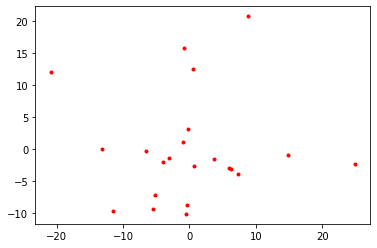

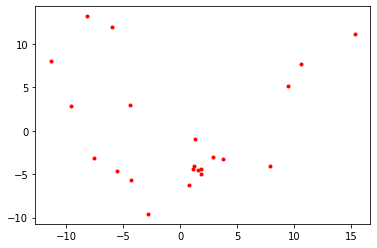

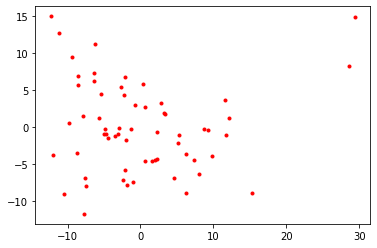

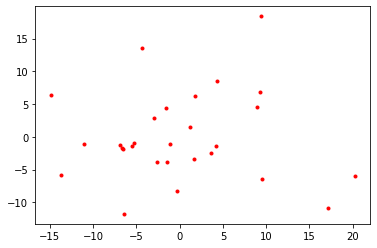

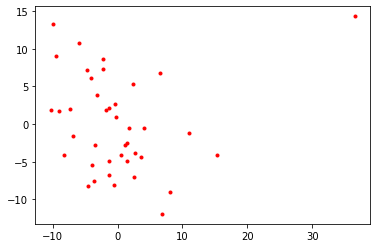

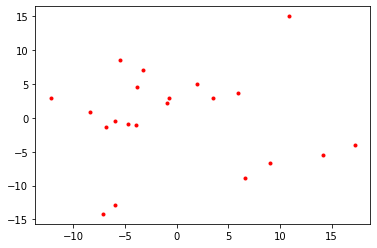

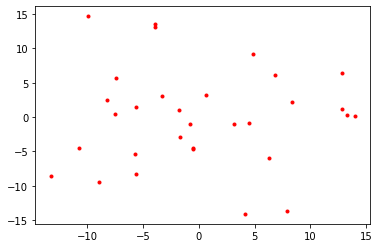

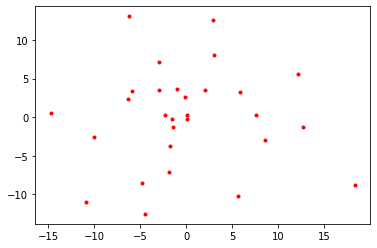

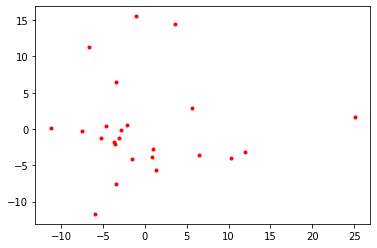

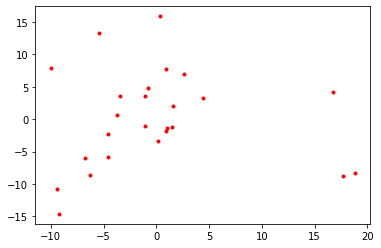

In [16]:
# 采用Word2Vec词聚类方法抽取关键词2——根据候选关键词的词向量进行聚类分析
import sys,os
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# 对词向量采用K-means聚类抽取TopK关键词
topK=6
def getkeywords_kmeans(data,topK):
    words = data["word"] # 词汇
    vecs = data.iloc[:,1:] # 向量表示

    kmeans = KMeans(n_clusters=1,random_state=10).fit(vecs)
    labels = kmeans.labels_ #类别结果标签
    labels = pd.DataFrame(labels,columns=['label'])
    new_df = pd.concat([labels,vecs],axis=1)
    df_count_type = new_df.groupby('label').size() #各类别统计个数
    # print df_count_type
    vec_center = kmeans.cluster_centers_ #聚类中心

    # 计算距离（相似性） 采用欧几里得距离（欧式距离）
    distances = []
    vec_words = np.array(vecs) # 候选关键词向量，dataFrame转array
    vec_center = vec_center[0] # 第一个类别聚类中心,本例只有一个类别
    length = len(vec_center) # 向量维度
    for index in range(len(vec_words)): # 候选关键词个数
        cur_wordvec = vec_words[index] # 当前词语的词向量
        dis = 0 # 向量距离
        for index2 in range(length):
            dis += (vec_center[index2]-cur_wordvec[index2])*(vec_center[index2]-cur_wordvec[index2])
        dis = math.sqrt(dis)
        distances.append(dis)
    distances = pd.DataFrame(distances,columns=['dis'])

    result = pd.concat([words, labels ,distances], axis=1) # 拼接词语与其对应中心点的距离
    result = result.sort_values(by="dis",ascending = True) # 按照距离大小进行升序排序

    # 将用于聚类的数据的特征维度降到2维
    pca = PCA(n_components=2)
    new_pca = pd.DataFrame(pca.fit_transform(new_df))
    #print new_pca
    #可视化
    d = new_pca[new_df['label'] == 0]
    plt.plot(d[0],d[1],'r.')
    d = new_pca[new_df['label'] == 1]
    plt.plot(d[0], d[1], 'go')
    d = new_pca[new_df['label'] == 2]
    plt.plot(d[0], d[1], 'b*')
    plt.gcf().savefig('kmeans.png')
    plt.show()

    # 抽取排名前topK个词语作为文本关键词
    wordlist = np.array(result['word']) # 选择词汇列并转成数组格式
    word_split = [wordlist[x] for x in range(0,topK)] # 抽取前topK个词汇
    word_split = " ".join(word_split)
    return word_split

def main():
    # 读取数据集
    dataFile = 'sample_data.csv'
    articleData = pd.read_csv(dataFile)
    ids, titles, keys = [], [], []

    rootdir = "vecs" # 词向量文件根目录
    fileList = os.listdir(rootdir) #列出文件夹下所有的目录与文件
    # 遍历文件
    for i in range(len(fileList)):
        filename = fileList[i]
        path = os.path.join(rootdir,filename)
        if os.path.isfile(path):
            data = pd.read_csv(path) # 读取词向量文件数据
            #data = pd.read_csv(path)
            artile_keys = getkeywords_kmeans(data,topK) # 聚类算法得到当前文件的关键词
            #print(artile_keys)
            #break
            artile_keys=artile_keys
            # 根据文件名获得文章id以及标题
            (shortname, extension) = os.path.splitext(filename) # 得到文件名和文件扩展名
            t = shortname.split("_")
            article_id = int(t[len(t)-1]) # 获得文章id
            artile_tit = articleData[articleData.id==article_id]['title'] # 获得文章标题
            artile_tit = list(artile_tit)[0] # series转成字符串
            ids.append(article_id)
            titles.append(artile_tit)            
            keys.append(artile_keys)
            #keys.append(artile_keys)
    # 所有结果写入文件
    result = pd.DataFrame({"id": ids, "title": titles, "key": keys}, columns=['id', 'title', 'key'])
    result = result.sort_values(by="id",ascending=True) # 排序
    result.to_csv("result/keys_word2vec.csv", index=False)

if __name__ == '__main__':
    main()




### 1.7.6 查了结果

1）查看原材料前 4 个主题及概要信息，结果如下

In [22]:
#查看原文件各主题及其概要说明
! head -3 sample_data.csv

2）生成的各主题关键词，结果如下：

In [21]:
#查看各主题提炼的关键字
! head -3 result/keys_word2vec.csv

id,title,key
1,永磁电机驱动的纯电动大巴车坡道起步防溜策略,力矩 开度 设定值 坡道 闭环控制 使能
2,机动车辆车门的肘靠,溃缩 衬板 元件 交叉 凹陷 机动车辆
